## 误差传递公式

### 乘法传递

设

$$
z = f(x,y)
$$

利用泰勒展开

$$
\Delta z \approx \frac{\partial f}{\partial x}\Delta x + \frac{\partial f}{\partial y}\Delta y
$$

根据方差的定义

$$
\sigma_z^2 = Var(z) = E[(\Delta z)^2] = E[(\frac{\partial f}{\partial x}\Delta x + \frac{\partial f}{\partial y}\Delta y)^2]
$$

展开并进行整理

$$
\sigma_z^2 = (\frac{\partial f}{\partial x})^2 E[(\Delta x)^2] + (\frac{\partial f}{\partial y})^2 E[(\Delta y)^2] + 2 \frac{\partial f}{\partial x}\frac{\partial f}{\partial y}E[\Delta x \Delta y]
$$

X与Y相互独立时，其协方差 $ E[\Delta x \Delta y] = 0 $

$$
\sigma_z^2= (\frac{\partial f}{\partial x})^2 \sigma_x^2 + (\frac{\partial f}{\partial y})^2 \sigma_y^2
$$

当 $z = xy$ 时

$$
\sigma^2(xy) = y^2 \sigma_x^2 + x^2 \sigma_y^2
$$

变换即得

$$
\frac{\sigma^2(xy)}{x^2 y^2} = \frac{\sigma_x^2}{x^2} + \frac{\sigma_y^2}{y^2}
$$

### 除法传递

当 $ z = \frac{x}{y} $ 时

$$
\sigma^2(\frac{x}{y}) = \frac{1}{y^2} \sigma_x^2 + \frac{x^2}{y^4} \sigma_y^2
$$

则

$$
\frac{\sigma^2(\frac{x}{y})}{(\frac{x}{y})^2} = \frac{\sigma_x^2}{x^2} + \frac{\sigma_y^2}{y^2}
$$

### 幂传递

当 $ z = x^n $ 时

$$
\sigma^2(x^n) = n^2 x^{2n-2} \sigma_x^2
$$

则

$$
\sigma(x^n) = n {|x|}^{n-1} \sigma_x
$$

即有

$$
\frac{\sigma(x^n)}{|x^n|} = \frac{n \sigma_x}{|x|}
$$

## 买书问题

根据题意，小明在第$i$家店的停留时间$X_i$服从$\lambda = 0.5$的指数分布

$$
E(X) = \frac{1}{\lambda} = 2
$$

$$
Var(X) = \frac{1}{\lambda^2} = 4
$$

对于买到书时所逛的店数$N$，其满足$p=0.1$的几何分布

$$
E(N) = \frac{1}{p} = 10
$$

$$
Var(N) = \frac{1-p}{p^2} = 90
$$

则对于

$$
Y = \sum_{i=1}^{N} = X_i
$$

$$
E(Y) = E(N)E(X) = 10 \times 2 = 20
$$

$$
Var(Y) = Var(X)E(N) + (E(X))^2Var(N) = 4 \times 10 + 2^2 \times 90 = 400
$$

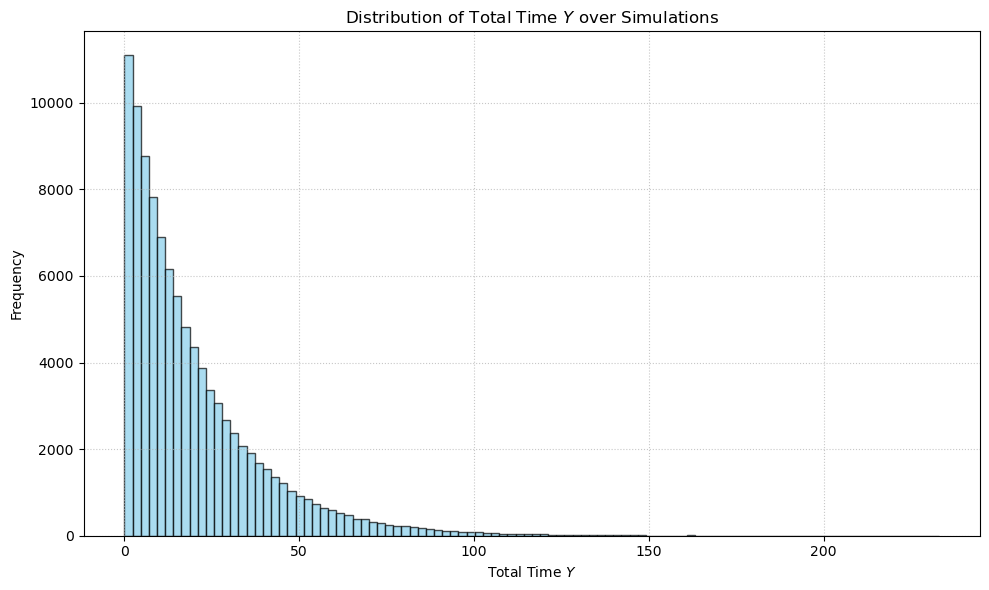

理论均值 E(Y): 20
模拟均值 E(Y): 19.8135
理论方差 var(Y): 400
模拟方差 var(Y): 393.6515


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import geom, expon

p = 0.1                    # 几何分布参数 p
lambda_exp = 0.5           # 指数分布参数 λ
scale = 1 / lambda_exp     
num_simulations = 100000   # 总模拟次数

# 存储所有 Y 样本
Y_samples = []

for i in range(num_simulations):
    N = geom.rvs(p)  # 几何分布
    Xs = expon.rvs(scale=scale, size=N)  # 指数分布
    Y = np.sum(Xs)
    Y_samples.append(Y)

# 绘制 Y 值的分布直方图
plt.figure(figsize=(10, 6))
plt.hist(Y_samples, bins=100, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Total Time $Y$ over Simulations')
plt.xlabel('Total Time $Y$')
plt.ylabel('Frequency')
plt.grid(True, linestyle=':', alpha=0.7)

plt.tight_layout()
plt.show()

theoretical_mean = 20
theoretical_var = 400
E_Y_sim = np.mean(Y_samples)
var_Y_sim = np.var(Y_samples, ddof=1)

print(f"理论均值 E(Y): {theoretical_mean}")
print(f"模拟均值 E(Y): {E_Y_sim:.4f}")
print(f"理论方差 var(Y): {theoretical_var}")
print(f"模拟方差 var(Y): {var_Y_sim:.4f}")